In [1]:
import pickle

In [2]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [4]:
from plot_utils import *

In [3]:
from importlib import reload


import plot_utils
reload(plot_utils)
from plot_utils import *

In [5]:
from diffusion_utils import *

In [ ]:
from importlib import reload


import diffusion_utils
reload(diffusion_utils)
from diffusion_utils import *

# Load

In [6]:
params_list=[
({'nu':0,'de':1,},
{'p_ctrl':[0.4,0.5,0.6],
'p_proj':np.linspace(0.0,0.0,1),
'sC':np.arange(100),
'sm':np.arange(500),
'L':[10,20,30]}
),
]

In [220]:
# for fixed_params,vary_params in params_list:
#     data_MPS_0_T_dict=generate_params(
#         fixed_params=fixed_params,
#         vary_params=vary_params,
#         fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_O_op.json',
#         # fn_dir_template='./MPS_0-1_C_m_x00',
#         fn_dir_template='./MPS_0-1_C_m_x01',
#         # fn_dir_template='./MPS_0-1_C_m_x0',
#         input_params_template='{p_ctrl:.3f} {p_proj:.3f} {L} {sC} {sm} ',
#         load_data=load_json,
#         filename='params_CT_MPS_0_C_m.txt',
#         filelist=None,
#         load=False,
#         data_dict=None,
#         # data_dict_file='xj({nu},{de})_C_m.pickle', 
#         # data_dict_file='xj({nu},{de})_C_m.json', 
#     )

generate_params: 100%|██████████| 450000/450000 [00:15<00:00, 28309.75it/s]


In [7]:
40*450000/1000/1000

18.0

In [ ]:
load_json('MPS_0-1_C_m_x01/MPS_(0,1)_L10_pctrl0.400_pproj0.000_sC0_sm0_x01_DW_O_op.json')

In [199]:
for fixed_params,vary_params in params_list:
    data_MPS_0_DW_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_DW_O_op.json',
        fn_dir_template='./MPS_0-1_C_m_x01',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        zip_fn='./MPS_0-1_C_m_x01.zip'  
    )
df_MPS_0_DW=convert_pd(data_MPS_0_DW_dict,names=['Metrics','sm','sC','p_ctrl','L','p_proj',])

generate_params: 100%|██████████| 450000/450000 [05:14<00:00, 1428.93it/s] 


In [200]:
df_MPS_0_DW

,,,,,,observations
Metrics,sm,sC,p_ctrl,L,p_proj,
O2,0,0,0.4,10,0.0,0.2534917250047028
DW1,0,0,0.4,10,0.0,7.687237229078826
O1,0,0,0.4,10,0.0,0.44234512037467394
Oi,0,0,0.4,10,0.0,"[0.9999999999999996, 0.9999999999999998, -0.76..."
DW2,0,0,0.4,10,0.0,60.13854394222676
...,...,...,...,...,...,...
DW1,407,14,0.5,20,0.0,4.83037345617685
O1,407,14,0.5,20,0.0,0.7273197351973364
Oi,407,14,0.5,20,0.0,"[0.9999999999999973, 0.9999999999999971, 0.999..."


In [8]:
len([x for x in df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics').loc[0][0] if x[0]['Type']=='Control'])

88

# Number of trajectory

In [ ]:
[x[0]['Outcome'][0] for x in df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[0] if x[0]['Type']=='Control']

In [84]:
np.unique(df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(4,level='sC').xs('op_history',level='Metrics')['observations'].apply(lambda x: [x[0]['Outcome'][0] for x in x if x[0]['Type']=='Control']).values).shape[0]

2

In [254]:
m_map=np.stack(df_MPS_0_DW.xs(20,level='L').xs(0.5,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('op_history',level='Metrics')['observations'].apply(lambda x: [x[0]['Outcome'][0] for x in x if x[0]['Type']=='Control']).values)

    # for tmax in range(1,zz.shape[1]):
    #     num_traj_list[tmax-1]=np.unique(m_map[:,:tmax],axis=0).shape[0]  

In [255]:
num_traj_list=np.zeros(m_map.shape[1]-1)
for tmax in range(1,m_map.shape[1]):
    num_traj_list[tmax-1]=np.unique(m_map[:,:tmax],axis=0).shape[0]  

In [257]:
num_traj_list[-1]

179.0

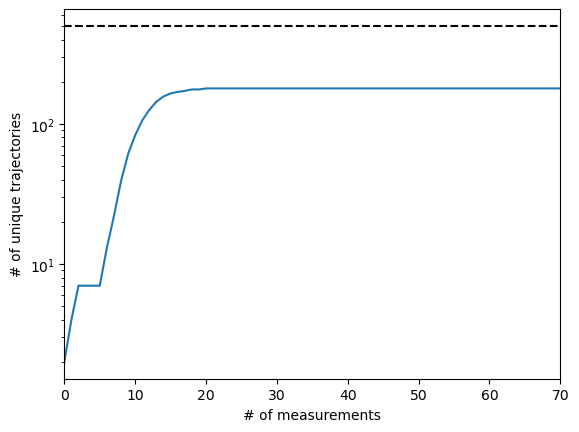

In [256]:
fig,ax=plt.subplots()
ax.plot(num_traj_list)
ax.set_yscale('log')
ax.set_xlim(0,70)
ax.set_xlabel('# of measurements')
ax.set_ylabel('# of unique trajectories')
ax.axhline(500,ls='--',color='k')

In [136]:
num_traj_list_2=np.zeros(m_map.shape[1]-1)
for tmax in range(1,m_map.shape[1]):
    num_traj_list_2[tmax-1]=np.unique(m_map[:,:tmax],axis=0).shape[0]  

In [119]:
import matplotlib.pyplot as plt

In [ ]:
?? Maybe make a plot of trajectory, similar to arXiv:2212.14026

## Plot

In [150]:
traj_list=df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[0]

In [134]:
def plot_U(i,t,ax):
    ax.plot([i,i+1],[t,t+1],color='k',linewidth=0.5)

In [160]:
def plot_P(i,t,m,ax):
    ax.plot([i,i-m,i-1],[t,t+1/2,t+1],color='b',linewidth=0.5)

In [153]:
traj_list[0][0]

{'Site': [10], 'Outcome': [1], 'Type': 'Control'}

In [ ]:
traj_list

In [185]:
def plot_single_traj(traj_list,tmax,ax):
    for idx,traj in enumerate(traj_list[:tmax]):
        if traj[0]['Type']=='Control':
            plot_P(traj[0]['Site'][0],idx,traj[0]['Outcome'][0],ax)
        elif traj[0]['Type']=='Bernoulli':  # Replace 'condition' with the actual condition
            plot_U(traj[0]['Site'][0],idx,ax)

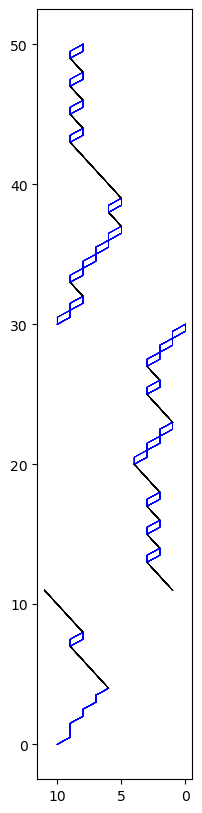

In [180]:
fig,ax=plt.subplots(figsize=(2,10))

for idx in range(50):
    traj0=df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[idx]
    plot_single_traj(traj0,50,ax)

ax.invert_xaxis()

In [182]:
def plot_P_binary(i,t,m,ax):
    f = i+1-2*m
    ax.plot([i,f],[t,t+1],color='b',linewidth=0.5)
    return f

In [195]:
def plot_single_traj_binary(traj_list,tmax,ax):
    i=0
    t=0
    for traj in traj_list[:tmax]:
        if traj[0]['Type']=='Control':
            i=plot_P_binary(i,t,traj[0]['Outcome'][0],ax)
            t+=1

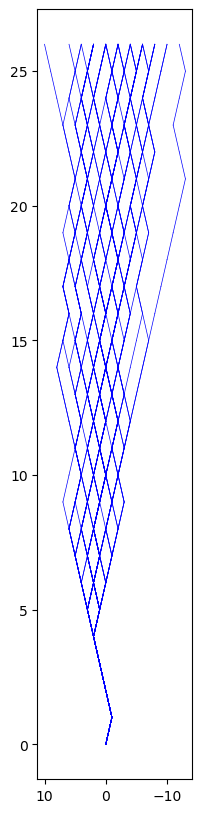

In [198]:
fig,ax=plt.subplots(figsize=(2,10))

for idx in range(50):
    traj0=df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(1,level='sC').xs('op_history',level='Metrics')['observations'].loc[idx]
    plot_single_traj_binary(traj0,50,ax)

ax.invert_xaxis()

# FDW

## QuVar of FDW

In [218]:
def qvar_dw(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    qvar_dw=dd.xs('DW2')-dd.xs('DW1')**2
    return qvar_dw.mean().values[0]
    # return qvar_dw

In [219]:
qvar_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50).mean()

1.444185833678212

In [220]:
num_SC=100
sC_qvar_dw=[qvar_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_dw),np.std(sC_qvar_dw)/np.sqrt(num_SC)

(1.6189448423357957, 0.06654442946901248)

In [223]:
num_SC=100
sC_qvar_dw=[qvar_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_dw),np.std(sC_qvar_dw)/np.sqrt(num_SC)

(1.6301271481200144, 0.07123987387413291)

In [224]:
num_SC=100
sC_qvar_dw=[qvar_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_dw),np.std(sC_qvar_dw)/np.sqrt(num_SC)

(1.6237439294137779, 0.07269574319520691)

In [222]:
num_SC=10
sC_qvar_dw=[qvar_dw(df_MPS_0_DW, L=10,p_ctrl=0.5,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_dw),np.std(sC_qvar_dw)/np.sqrt(num_SC)

(1.4191452320542064, 0.22371302998015072)

In [20]:
num_SC=50
sC_qvar_dw=[qvar_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_dw),np.std(sC_qvar_dw)/np.sqrt(num_SC)

(1.6599744440295274, 0.10242964683066044)

In [21]:
num_SC=50
sC_qvar_dw=[qvar_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_dw),np.std(sC_qvar_dw)/np.sqrt(num_SC)

(1.4464041612804446, 0.07938711814243127)

## traj_var of FDW

In [225]:
def traj_var_dw(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')

    return (dd.xs('DW1')).var()[0]

In [226]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC)

(0.1543459103615963, 0.010681204300121745)

In [227]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC)

(0.15142929346273065, 0.01494329125894529)

In [228]:
num_SC=100
sC_traj_var_dw=[traj_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_dw),np.std(sC_traj_var_dw)/np.sqrt(num_SC)

(0.13825723947559518, 0.013027412498212487)

In [58]:
traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

0.15488138671312626

In [ ]:
traj_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

,observations
sm,
0,8.595845958102574
1,8.326611178924882
2,7.568576414222883
3,8.265966164960947
4,8.445091991106834
...,...
495,7.982707179591197
496,7.753464873544234
497,7.973719576466471


## circuit_var of FDW

In [229]:
def circ_var_dw(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')

    return (dd.xs('DW1')).mean()[0]

In [230]:
circ_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

8.23513415660248

In [231]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_dw)
# np.mean(sC_circ_var_dw),np.std(sC_circ_var_dw)/np.sqrt(num_SC)

4.26445540284093

In [232]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_dw)
# np.mean(sC_circ_var_dw),np.std(sC_circ_var_dw)/np.sqrt(num_SC)

4.071057878193988

In [233]:
num_SC=100
sC_circ_var_dw=[circ_var_dw(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_dw)
# np.mean(sC_circ_var_dw),np.std(sC_circ_var_dw)/np.sqrt(num_SC)

7.964022521404832

In [ ]:
?? How does it compare to classical random walk, biased and starting at k=1?

In [69]:
np.unique(df_MPS_0_DW.index.get_level_values('Metrics'))

array(['DW1', 'DW2', 'O1', 'O2', 'Oi', 'op_history'], dtype=object)

# O

## qvar of O

In [234]:
def qvar_O(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    qvar_O=dd.xs('O2')-dd.xs('O1')**2
    return qvar_O.mean().values[0]
    # return qvar_O

In [235]:
qvar_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=0).mean()

0.06428753940065807

In [236]:
num_SC=100
sC_qvar_O=[qvar_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_O),np.std(sC_qvar_O)/np.sqrt(num_SC)

(0.06912434609023921, 0.0020647096848795043)

In [237]:
num_SC=100
sC_qvar_O=[qvar_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_O),np.std(sC_qvar_O)/np.sqrt(num_SC)

(0.039155090774166706, 0.0005838420584064467)

In [238]:
num_SC=100
sC_qvar_O=[qvar_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_qvar_O),np.std(sC_qvar_O)/np.sqrt(num_SC)

(0.025906526234385146, 0.0003415981325711789)

## traj_var of O

In [239]:
def traj_var_O(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('O1').var()[0]

In [61]:
traj_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

0.011607035894892788

In [240]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC)

(0.0059073010477680935, 0.0002717972019102988)

In [241]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC)

(0.0029442501486311393, 0.00010133385188069294)

In [242]:
num_SC=100
sC_traj_var_O=[traj_var_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_O),np.std(sC_traj_var_O)/np.sqrt(num_SC)

(0.002026370935199138, 6.092419125896659e-05)

## circuit_var of O

In [64]:
def circ_var_O(df, L,p_ctrl,p_proj,sC):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('O1').mean()[0]

In [66]:
circ_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50)

0.028034221058116073

In [243]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_O)

0.04744827026090902

In [244]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_O)

0.013573266999547695

In [245]:
num_SC=100
sC_circ_var_O=[circ_var_O(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC) for sC in np.arange(num_SC)]


np.var(sC_circ_var_O)

0.011164835099472753

# Z_1

## qvar of Zi

In [91]:
def qvar_Z(df, L,p_ctrl,p_proj,sC,i):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    qvar_Zi=1-dd.xs('Oi').applymap(lambda x: x[i]**2)
    return qvar_Zi.mean().values[0]

In [97]:
qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=4,i=0)

-7.225331444260519e-16

In [ ]:
qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=4,i=-1)

0.8457728980855934

In [246]:
num_SC=100
sC_qvar_Z_right=[qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_right),np.std(sC_qvar_Z_right)/np.sqrt(num_SC)

(0.3289483372422052, 0.04156150771497301)

In [247]:
num_SC=100
sC_qvar_Z_right=[qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_right),np.std(sC_qvar_Z_right)/np.sqrt(num_SC)

(0.32231839904953935, 0.04177081299456341)

In [248]:
num_SC=100
sC_qvar_Z_right=[qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_right),np.std(sC_qvar_Z_right)/np.sqrt(num_SC)

(0.26024375229821617, 0.039494147753851586)

In [249]:
num_SC=100
sC_qvar_Z_left=[qvar_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_left),np.std(sC_qvar_Z_left)/np.sqrt(num_SC)

(0.8359453414702374, 0.01435548012315748)

In [250]:
num_SC=100
sC_qvar_Z_left=[qvar_Z(df_MPS_0_DW, L=20,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_left),np.std(sC_qvar_Z_left)/np.sqrt(num_SC)

(0.8510813024967825, 0.013374313529025595)

In [251]:
num_SC=100
sC_qvar_Z_left=[qvar_Z(df_MPS_0_DW, L=30,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
np.mean(sC_qvar_Z_left),np.std(sC_qvar_Z_left)/np.sqrt(num_SC)

(0.8413240528799324, 0.011004081718311104)

## traj_var of Zi

In [100]:
def traj_var_Z(df, L,p_ctrl,p_proj,sC,i):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('Oi').applymap(lambda x: x[i]).var().values[0]

In [111]:
traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=6,i=0)

0.12182746842547218

In [103]:
traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50,i=-1)

0.04172187833456101

In [107]:
num_SC=50
sC_traj_var_Z_right=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_Z_right),np.std(sC_traj_var_Z_right)/np.sqrt(num_SC)

(0.034973115725274326, 0.00908199442683957)

In [112]:
num_SC=50
sC_traj_var_Z_left=[traj_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]
np.mean(sC_traj_var_Z_left),np.std(sC_traj_var_Z_left)/np.sqrt(num_SC)

(0.08257149597114327, 0.013744227512932278)

## circuit_var of Z

In [113]:
def circ_var_Z(df, L,p_ctrl,p_proj,sC,i):
    dd=df.xs(L,level='L').xs(p_ctrl,level='p_ctrl').xs(p_proj,level='p_proj').xs(sC,level='sC')
    return dd.xs('Oi').applymap(lambda x: x[i]).mean().values[0]

In [117]:
circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=49,i=0)

1.0000000000000002

In [116]:
circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=50,i=-1)

-0.5103932928959115

In [119]:
num_SC=50
sC_circ_var_Z_left=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=0) for sC in np.arange(num_SC)]

np.var(sC_circ_var_Z_left)

0.20992047970784428

In [120]:
num_SC=50
sC_circ_var_Z_right=[circ_var_Z(df_MPS_0_DW, L=10,p_ctrl=0.4,p_proj=0.0,sC=sC,i=-1) for sC in np.arange(num_SC)]

np.var(sC_circ_var_Z_right)

0.08287922886302779

In [194]:
df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw1',level='Metrics')

,observations
sm,
0,16.61630843072915
1,16.660991586580508
2,16.673339244685252
3,16.825154890560217
4,16.54317402506362
...,...
495,16.986097016147177
496,17.347125376363778
497,17.243169791520977


In [195]:
df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw2',level='Metrics')

,observations
sm,
0,278.43879379109353
1,281.05608301650176
2,279.9290195706446
3,284.4791177454983
4,275.7232849771889
...,...
495,289.9058812196481
496,302.2104394226964
497,298.9892100989224


In [196]:
df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw2',level='Metrics')-df_MPS_0_DW.xs(20,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('dw1',level='Metrics')**2

,observations
sm,
0,2.337088
1,3.467442
2,1.928778
3,1.393281
4,2.046678
...,...
495,1.378389
496,1.287681
497,1.662306


In [52]:
71/200

0.355

In [41]:
df_MPS_0_DW.xs(10,level='L').xs(0.4,level='p_ctrl').xs(0.0,level='p_proj').xs(0,level='sC').xs('op_history',level='Metrics')

,observations
sm,
0,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
1,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
2,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
3,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
4,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
...,...
495,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
496,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."
497,"[[{'Site': [10, 1], 'Outcome': None, 'Type': '..."


In [52]:
d1['O']

0.44234512037467527

In [53]:
d2['O']

0.33876001349717366

In [50]:
d1=load_json('MPS_0-1_C_m_x01/MPS_(0,1)_L10_pctrl0.400_pproj0.000_sC0_sm0_x01_DW_O_op.json')

In [51]:
d2=load_json('MPS_0-1_C_m_x01/MPS_(0,1)_L10_pctrl0.400_pproj0.000_sC0_sm1_x01_DW_O_op.json')

In [36]:
d3=load_json('MPS_(0,1)_L8_pctrl0.500_pproj0.000_sC1_sm0_x01_DW_O_op.json')

In [20]:
d1['op_history']

[[{'Site': [8, 1], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [1, 2], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [2], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [1], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [8], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [7], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [6], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [5], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [4, 5], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [5, 6], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [6, 7], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [7, 8], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [8, 1], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [1, 2], 'Outcome': None, 'Type': 'Bernoulli'}],
 [{'Site': [2], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [1], 'Outcome': [0], 'Type': 'Control'}],
 [{'Site': [8], 'Outcome': [1], 'Type': 'Control'}],
 [{'Site': [7], 'Outcome': [1], 'Type': 'Control'}]

In [43]:
d2['op_history'][0]

[{'Site': [8, 1], 'Outcome': None, 'Type': 'Bernoulli'}]

In [46]:
all([x[0]['Site'] == y[0]['Site'] for x,y in zip(d1['op_history'],d2['op_history'])])

True

In [54]:
[(x[0]['Outcome'] , y[0]['Outcome']) for x,y in zip(d1['op_history'],d2['op_history'])]

[(None, None),
 (None, None),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 ([1], [0]),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 ([0], [1]),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 ([0], [1]),
 (None, None),
 (None, None),
 ([0], [0]),
 ([1], [1]),
 (None, None),
 (None, None),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 ([0], [0]),
 ([0], [0]),
 ([1], [1]),
 (None, None),
 ([0], [1]),
 (None, None),
 ([1], [0]),
 ([0], [0]),
 (None, None),
 ([0], [0]),
 ([1], [0]),
 ([1], [1]),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 (None, None),
 ([1], [0]),
 ([0], [1]),
 ([0], [1]),
 ([1], [0]),
 ([0], [1]),
 (None, None),


In [49]:
[(x[0] , y[0]) for x,y in zip(d1['op_history'],d2['op_history']) if x[0] != y[0]]

[]